Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT license. (c)2014 Nicholas Batista

#**Pressure Effects of Dimple-Like Ridges**
Authored by: Nicholas Batista
MAE 6226
Barba
5/7/2015

###**Aerodynamic Effect of Dimple Structure**

Dimples are an example of a passive roughness element utilized in many aerodynamic applications to reduce drag on bodies. Dimples destabilize flow around an object or along a surface, generating shear layer instability ([**1**], Beratlis 2014). This instability stimulates turbulence within the boundary layer, thereby reducing viscous drag.
Current commercial applications for dimpled surfaces include golf balls, helmets, bicycle wheels, and automotive spoilers, to name only a few.

###**Objective**
Air flowing over a dimpled surface is "tripped", recirculating within the dimple. If the flow has not separated from the surface, this perturbation induces pressure on the object at the location of the dimple.

The objective of this analysis is to visualize this induced pressure and discuss its implications on structural design.

###**Method of Analysis**
**+** XFLR5-->Visualize Effects of Dimpled Ridge

**+** Source Panel Method-->Pressure Calculation & Visualization

**+** Design Considerations-->Induced Stagnation points-->Downward force on dimple surface

###**Symmetric Foil Design**

####**Figure 1: NACA0010-35 Symmetric Airfoil**
<img src="./resources_foils/pictures/naca0010_35.png">
The symmetric airfoil used to perform this computational analysis was based off the NACA0010-35 airfoil [**2**, UIUC 2015]. The long "nose" of this airfoil was maintained to reduce the stagnation pressure at the leading edge while providing a gradually elevating entrance length (50% of chord length). Once the upper surface rises to the maximum thickness of the airfoil, an extension of constant thickness was added to enable the incorporation of dimples of various sizes on the airfoil surface. The trailing edge was formed by scaling the first half of the airfoil by 0.2, reducing from the maximum thickness to zero thickness in 10% of the chord length.
####**Figure 2: Modified Airfoil for Baseline Analysis**
<img src="./resources_foils/pictures/sym_build.png">

#### **Figure 3: Modified Foil & Spherical Dimples** 
<img src="./resources_foils/gifs/foils.gif">

The images above display the symmetric airfoil and varying sizes of dimples incorporated on the upper surface.

#### **Chart 1: Dimple Size Chart** 
<img src="./resources_foils/pictures/dimple_size_chart.jpg">

###**Dimple Design**
Notice that the dimples are designed with a depth/diameter ratio of 0.1. This optimized design is based on a study performed by Nikos Beratlis on the effects of dimples on laminar boundary layers [**1**, Beratlis 2014].

####**Figure 4: Near-Wall Vortices Visualization**
<img src="./resources_foils/pictures/beratlis.png">
The figure above depicts the top view of near-wall vorticies visualised following a single row of dimples [**1**, Beratlis 2014]

The chart above lists the spherical diameters of each dimple, along with the total depth of each dimple with respect to the upper surface. The width measurements refer to the length of each dimple along the chord axis. These lengths are normalized based on a chord length of 1.0.

The depth percentage indicates how deep the dimple is "cut" into the upper surface with respect to half the thickness of the airfoil. Notice that the dimple of the fifth airfoil arcs below the airfoil's axis of symmetry. Progressively larger dimples were incorporated to help visualize pressure effects. 

###**XFLR5 Vortex Lattice Method Analysis**
XFLR5 provided a convenient way to visualize the pressure effects induced by incorporating a dimple-like, roughness element.

#### **Figure 5: XFLR5 Pressure/Force Visualization** <img src="./resources_foils/gifs/xflr5.gif">

The images above display a symmetric wing with a dimple-like ridge along the span of the upper surface. This animation shows the different dimpled airfoils under a constant velocity and angle of attack. Vortex lattice method analysis through XFLR5 indicates an increase in the panel loading as a function of increasing dimple/ridge diameter.

###**Short Description of Source Panel Method**
By utilizing the source panel method, an airfoil body is approximated by a number of panels. These panels simulate a rigid frame by enforcing a zero velocity normal to each panel. This direct method can be used to determine the pressure distribution of an object in a potential flow [3,Barba 2015].

#### **Figure 6: Coefficient of Pressure vs. Panel Location** <img src="./resources_foils/gifs/cp_plots.gif">

#### **Figure 7: Streamlines around Modified Airfoil** <img src="./resources_foils/gifs/streamlines.gif">

#### **Figure 8: Pressure Contour Plot** <img src="./resources_foils/gifs/pressure_contour.gif">

###**Source Panel Visualization & Final Discussion**
Incorporation of a dimple-like roughness element can induce a positive pressure within the dimple cavity. Figure 5 and Figure 7 display the results of source panel method analysis conducted on each of the modified airfoils. Each figure indicates a positive pressure accumulation along the surface of the dimple cavity, focused at the center of the dimple.

These results indicate that dimpled roughness elements can induce pressure forces on an aerodynamic body. These forces may be negligible while considering fast moving objects possessing small dimple diameters (golf balls, for example), but should not be ignored if structural stability is a concern.

###**Coding: Source Panel Method**
Below is the python code utilized to conduct the source panel method analysis [**3**,Barba 2015].

In [1]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot

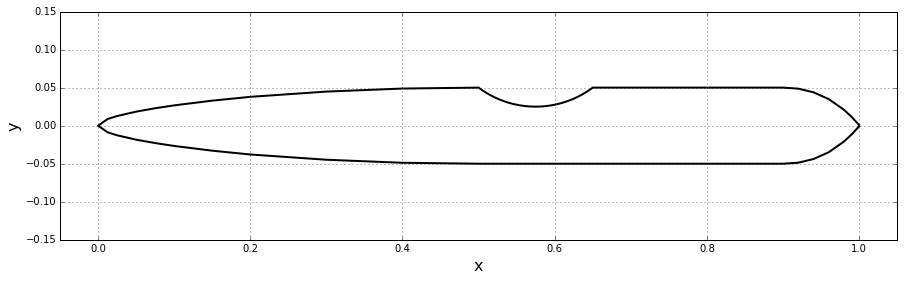

In [2]:
with open ('./resources_foils/dimple3.dat') as file_name:
    x,y=numpy.loadtxt(file_name,dtype=float,delimiter='\t',unpack=True)

%matplotlib inline

x_inc,y_inc=0.05,1.0
x_low,x_high=x.min(),x.max() #Highest and lowest x-coordinates from airfoil data file
y_low,y_high=y.min(),y.max() #Highest and lowest y-coordinates from airfoil data file
#Extablishing bounds for plot to visualize current airfoil
x_start,x_end=x_low-x_inc*(x_high-x_low),x_high+x_inc*(x_high-x_low)
y_start,y_end=y_low-y_inc*(y_high-y_low),y_high+y_inc*(y_high-y_low)

size=15
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.plot(x,y,color='k',linestyle='-',linewidth=2);

In [3]:
class Panel:
    def __init__(self,xa,ya,xb,yb):
        #Define panel builds by definining endpoints
        self.xa,self.ya=xa,ya
        self.xb,self.yb=xb,yb
        
        self.xc,self.yc=(xa+xb)/2,(ya+yb)/2       # define coordinate of center of panel
        self.length=math.sqrt((xb-xa)**2+(yb-ya)**2)     # define panel length
        
        # define the angled orientation of panel
        if xb-xa <= 0.:
            self.panel_angle=math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.panel_angle=math.pi + math.acos(-(yb-ya)/self.length)
        
        # location of the panel
        if self.panel_angle <= math.pi:
            self.loc='extrados'
        else:
            self.loc='intrados'

        self.source_strength=0.
        self.tangential_velocity=0.     # tangential velocity
        self.cp=0.     # coefficient of pressure

In [4]:
def define_panels(x, y, N=64):
    #Cosine method, utilized to divide airfoil geometry into panels (input: coordinates of airfoil and number of panels, output: array of panels
    R=(x.max()-x.min())/2                       
    x_center=(x.max()+x.min())/2
    x_circle=x_center + R*numpy.cos(numpy.linspace(0, 2*math.pi, N+1))  # x-coord of the circle points
    x_endpoints=numpy.copy(x_circle)
    y_endpoints=numpy.empty_like(x_endpoints)

    x,y=numpy.append(x,x[0]),numpy.append(y, y[0])
    
    # computes the y-coordinate of end-points
    I=0
    for i in range(N):
        while I < len(x)-1:
            if (x[I] <= x_endpoints[i] <= x[I+1]) or (x[I+1] <= x_endpoints[i] <= x[I]):
                break
            else:
                I += 1
        a=(y[I+1]-y[I])/(x[I+1]-x[I])
        b=y[I+1]-a*x[I+1]
        y_endpoints[i]=a*x_endpoints[i] + b
    y_endpoints[N]=y_endpoints[0]
    
    panels=numpy.empty(N,dtype=object)
    for i in range(N):
        panels[i]=Panel(x_endpoints[i],y_endpoints[i],x_endpoints[i+1],y_endpoints[i+1])
    
    return panels

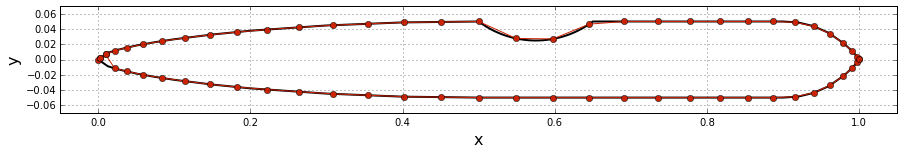

In [5]:
N=64                            
panels=define_panels(x,y,N) #performs paneling operation

# plots the geometry and the panels
inc_x,inc_y=0.05,0.2
x_low,x_high=min(panel.xa for panel in panels),max(panel.xa for panel in panels)
y_low,y_high=min(panel.ya for panel in panels),max(panel.ya for panel in panels)
x_start,x_end=x_low-inc_x*(x_high-x_low),x_high+inc_x*(x_high-x_low)
y_start,y_end=y_low-inc_y*(y_high-y_low),y_high+inc_y*(y_high-y_low)

size = 15
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.plot(x,y,color='k',linestyle='-',linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels],panels[0].xa), 
         numpy.append([panel.ya for panel in panels],panels[0].ya), 
         linestyle='-',linewidth=1,marker='o',markersize=6, color='#CD2305');

In [6]:
class Freestream:
    def __init__(self,u_free=1.0,AOA=0.0):
        self.u_free=u_free
        self.AOA=AOA*math.pi/180
        
u_free=1.0                                
AOA=0.0                                
freestream=Freestream(u_free,AOA)

In [7]:
def integral(x,y,panel,dxdz,dydz):
    #Panel contributions evaluated
    def func(s):
        return (((x-(panel.xa-math.sin(panel.panel_angle)*s))*dxdz
                  +(y-(panel.ya+math.cos(panel.panel_angle)*s))*dydz)
                /((x-(panel.xa-math.sin(panel.panel_angle)*s))**2
                   +(y-(panel.ya+math.cos(panel.panel_angle)*s))**2))
    return integrate.quad(lambda s:func(s), 0., panel.length)[0]

In [8]:
def build_matrix(panels):
    #Build matrix of panel sources
    N=len(panels)
    A=numpy.empty((N, N),dtype=float)
    numpy.fill_diagonal(A,0.5)
    
    for i,p_i in enumerate(panels):
        for j,p_j in enumerate(panels):
            if i !=j:
                A[i,j]=0.5/math.pi*integral(p_i.xc,p_i.yc,p_j,math.cos(p_i.panel_angle),math.sin(p_i.panel_angle))
    return A

def build_rhs(panels,freestream):
    #Build solution to linear system based on boundary conditions
    b=numpy.empty(len(panels),dtype=float)
    
    for i,panel in enumerate(panels):
        b[i]=-freestream.u_free*math.cos(freestream.AOA-panel.panel_angle)
    
    return b

In [9]:
A=build_matrix(panels)	                    # computes the singularity matrix
b=build_rhs(panels,freestream)               # computes the freestream RHS

In [10]:
# solves the linear system
source_strength=numpy.linalg.solve(A,b)

for i,panel in enumerate(panels):
	panel.source_strength=source_strength[i]

In [11]:
def get_tangential_velocity(panels,freestream):
    #Calculate the tangential velocity along each panel based on freestream conditions
    N=len(panels)
    A=numpy.empty((N,N),dtype=float)
    numpy.fill_diagonal(A,0.0)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i!=j:
                A[i,j]=0.5/math.pi*integral(p_i.xc,p_i.yc,p_j,-math.sin(p_i.panel_angle),math.cos(p_i.panel_angle))
    
    b=freestream.u_free*numpy.sin([freestream.AOA-panel.panel_angle for panel in panels])
    
    source_strength=numpy.array([panel.source_strength for panel in panels])
    
    tangential_velocity=numpy.dot(A,source_strength) + b
    
    for i, panel in enumerate(panels):
        panel.tangential_velocity=tangential_velocity[i]

In [12]:
# computes the tangential velocity at the center-point of each panel
get_tangential_velocity(panels,freestream)

In [13]:
def get_pressure_coefficient(panels, freestream):
    #Calculate cp at panel locations
    for panel in panels:
        panel.cp=1.0-(panel.tangential_velocity/freestream.u_free)**2

In [14]:
# computes the surface pressure coefficients
get_pressure_coefficient(panels,freestream)

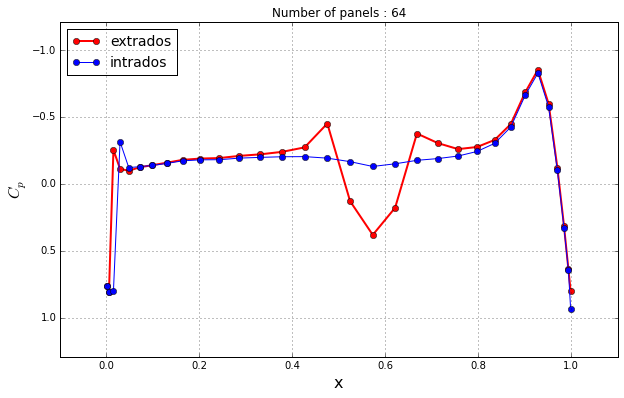

In [15]:
# plots the surface pressure coefficient
val_x,val_y=0.1,0.2
x_min,x_max=min( panel.xa for panel in panels ),max( panel.xa for panel in panels )
cp_min,cp_max=min( panel.cp for panel in panels ),max( panel.cp for panel in panels )
x_start,x_end=x_min-val_x*(x_max-x_min),x_max+val_x*(x_max-x_min)
y_start,y_end=cp_min-val_y*(cp_max-cp_min),cp_max+val_y*(cp_max-cp_min)

pyplot.figure(figsize=(10, 6))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('$C_p$',fontsize=16)
pyplot.plot([panel.xc for panel in panels if panel.loc=='extrados'], 
         [panel.cp for panel in panels if panel.loc=='extrados'], 
         color='r',linestyle='-',linewidth=2, marker='o',markersize=6)
pyplot.plot([panel.xc for panel in panels if panel.loc=='intrados'], 
         [panel.cp for panel in panels if panel.loc=='intrados'], 
         color='b',linestyle='-',linewidth=1,marker='o',markersize=6)
pyplot.legend(['extrados','intrados'], loc='best', prop={'size':14})
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.gca().invert_yaxis()
pyplot.title('Number of panels : %d' % N);

In [16]:
# Summation of Panel Source Strengths. Accuracy determined by comparing summation to desired net zero panel strengths.
accuracy=sum([panel.source_strength*panel.length for panel in panels])
acc=accuracy*100
print '--> sum of source/sink strengths=', accuracy
print '--> Accuracy of Panel Descritization (Percentage)=', acc

--> sum of source/sink strengths= -0.00038551236632
--> Accuracy of Panel Descritization (Percentage)= -0.038551236632


In [17]:
def get_velocity_field(panels, freestream, X, Y):
#Free stream velocity build
    Nx,Ny=X.shape
    u,v=numpy.empty((Nx,Ny),dtype=float),numpy.empty((Nx,Ny),dtype=float)
    
    for i in xrange(Nx):
        for j in xrange(Ny):
            u[i,j]=freestream.u_free*math.cos(freestream.AOA)\
                     +0.5/math.pi*sum([p.source_strength*integral(X[i,j],Y[i,j],p,1,0) for p in panels])
            v[i,j]=freestream.u_free*math.sin(freestream.AOA)\
                     +0.5/math.pi*sum([p.source_strength*integral(X[i,j],Y[i,j],p,0,1) for p in panels])
    
    return u,v

In [18]:
Nx,Ny=20,20
val_x,val_y=1.0,2.0
x_min,x_max=min(panel.xa for panel in panels),max(panel.xa for panel in panels)
y_min,y_max=min(panel.ya for panel in panels),max(panel.ya for panel in panels)
x_start,x_end=x_min-val_x*(x_max-x_min),x_max+val_x*(x_max-x_min)
y_start,y_end=y_min-val_y*(y_max-y_min),y_max+val_y*(y_max-y_min)

X,Y=numpy.meshgrid(numpy.linspace(x_start,x_end,Nx),numpy.linspace(y_start,y_end,Ny))
u,v=get_velocity_field(panels,freestream,X,Y)

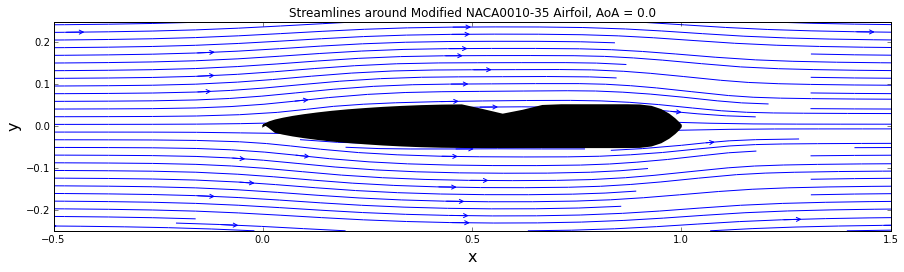

In [19]:
#Redefine bounds
x_start,x_end=-0.5,1.5
y_start,y_end=-0.25,0.25
#Plot streamlines around Airfoil
size=15
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.streamplot(X,Y,u,v,density=1,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.fill([panel.xc for panel in panels], 
         [panel.yc for panel in panels], 
         color='k',linestyle='solid',linewidth=2,zorder=2)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('Streamlines around Modified NACA0010-35 Airfoil, AoA = %.1f' % AOA);

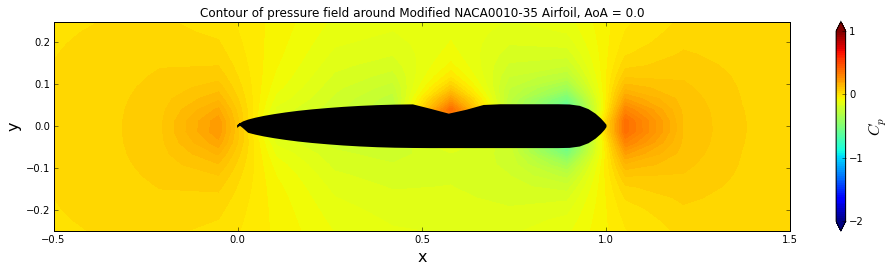

In [20]:
#Plot Pressure Field around Airfoil, Contour Plot
cp=1.0-(u**2+v**2)/freestream.u_free**2

# plots the pressure field
size=15
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
contf = pyplot.contourf(X,Y,cp,levels=numpy.linspace(-2.0,1.0,100),extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-2.0,-1.0,0.0,1.0])
pyplot.fill([panel.xc for panel in panels], 
         [panel.yc for panel in panels], 
         color='k', linestyle='solid', linewidth=2, zorder=2)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.title('Contour of pressure field around Modified NACA0010-35 Airfoil, AoA = %.1f' % AOA);

###**Citations**

[1] N. Beratlis, E. Balaras & K. Squires (2014) Effects of dimples on laminar boundary layers, Journal of Turbulence, 15:9, 611-627, DOI: 10.1080/14685248.2014.918270

[2] "NACA0010-35." UIUC Airfoil Data Site. UIUC Applied Aerodynamics Group, 2015. Web. 7 May 2015. <http://m-selig.ae.illinois.edu/ads/coord/naca001035.dat>. 

[3] Barba Group, The George Washington University, Apr 10, 2015, ***Lesson10_sourcePanelMethod***, Ipython Notebook, GitHub URL:<https://github.com/nbatista0630/AeroPython/blob/master/lessons/10_Lesson10_sourcePanelMethod.ipynb>

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./resources/custom.css", "r").read()
    return HTML(styles)
css_styling();